## 多项式回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3, 3, size = 100)
X = x.reshape(-1, 1)

In [3]:
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size = 100)

In [4]:
x.shape

(100,)

In [5]:
y.shape

(100,)

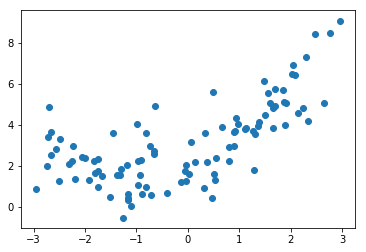

In [6]:
plt.scatter(x,y)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
y_predict = lin_reg.predict(X)

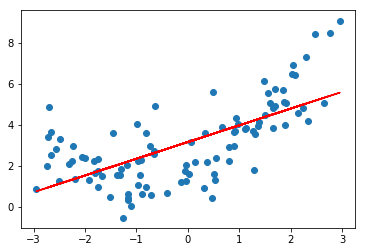

In [10]:
plt.scatter(x,y)
plt.plot(x,y_predict,color = 'r')

### 解决方案，添加一个特征

In [12]:
(X**2).shape

(100, 1)

In [13]:
X2 = np.hstack([X,X**2])

In [15]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2,y)
y_predict2 = lin_reg2.predict(X2)

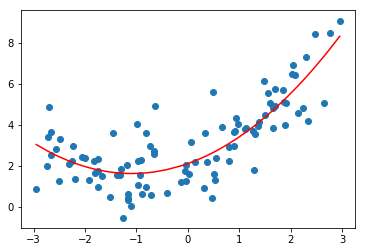

In [16]:
plt.scatter(x, y)
plt.plot(np.sort(x),y_predict2[np.argsort(x)], color ='r')

In [17]:
lin_reg2.coef_

array([0.89185181, 0.40949537])

### scikit-learn中的多项式回归和Pipeline

In [18]:
from sklearn.preprocessing import PolynomialFeatures

In [19]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [20]:
X2.shape

(100, 3)

In [21]:
X2[:5,:]

array([[ 1.00000000e+00,  9.22231488e-01,  8.50510918e-01],
       [ 1.00000000e+00,  3.20288520e-02,  1.02584736e-03],
       [ 1.00000000e+00, -2.24732838e+00,  5.05048486e+00],
       [ 1.00000000e+00,  4.94855565e-01,  2.44882030e-01],
       [ 1.00000000e+00, -2.31384613e+00,  5.35388394e+00]])

In [23]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X2, y)
y_predict2 = lin_reg.predict(X2)

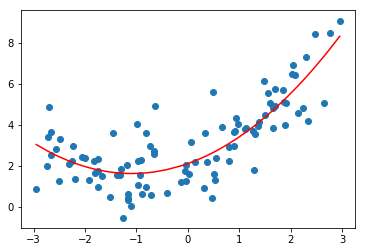

In [24]:
plt.scatter(x, y)
plt.plot(np.sort(x),y_predict2[np.argsort(x)], color ='r')

In [25]:
lin_reg.coef_

array([0.        , 0.89185181, 0.40949537])

## 关于PolynomialFeatures

In [26]:
X = np.arange(1,11).reshape(-1,2)

In [27]:
X.shape

(5, 2)

In [28]:
poly = PolynomialFeatures(degree = 2)
poly.fit(X)
X2 = poly.transform(X)

In [29]:
X2.shape

(5, 6)

In [30]:
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

In [31]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [32]:
x = np.random.uniform(-3, 3, size = 100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size = 100)

In [33]:
from sklearn.pipeline import Pipeline

In [36]:
from sklearn.preprocessing import StandardScaler
poly_reg = Pipeline([
    ("poly",PolynomialFeatures(degree=2)),
    ("std_scaler",StandardScaler()),
    ("lin_reg",LinearRegression())
])

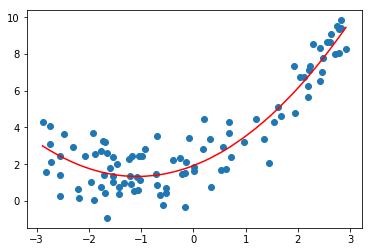

In [38]:
poly_reg.fit(X,y)
y_predict = poly_reg.predict(X)
plt.scatter(x,y)
plt.plot(np.sort(x), y_predict[np.argsort(x)],color = 'r')